# Enhanced Logistic Regression Model Failure Analysis

This notebook performs an in-depth analysis of our logistic regression model's performance using the LogisticRegressionModel class. We will examine:

1. Model loading and validation
2. Performance metrics and confusion matrix
3. Feature importance analysis
4. Error analysis and patterns
5. Case studies of misclassified examples

In [1]:
import sys
import os
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from IPython.display import display, Markdown

# Add parent directory to path for imports
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

from logistic_regression_model import LogisticRegressionModel
from utils.data_utils import load_data

# Remove parent directory from path after imports
sys.path.remove(parent_dir)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger(__name__)

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Load Model and Data

First, we'll load a previously trained model using its timestamp and prepare our validation data.

In [2]:
# Load the saved model
model_timestamp = "20250301_214334"
model_path = f"models/lr_model_{model_timestamp}.pkl"
preprocessor_path = f"models/lr_model_preprocessor_{model_timestamp}.pkl"

# Load the model
model = LogisticRegressionModel.load(model_path, preprocessor_path)

# Load validation data
validation_df = pd.read_csv('data/validation.csv')

Loading model from models/lr_model_20250301_214334.pkl
Loading preprocessor from models/lr_model_preprocessor_20250301_214334.pkl


In [3]:
# Run evaluation - the model will handle all preprocessing internally
test_results = model.test(df=validation_df)


Using 34 features from trained model
Processing data with 17 numeric and 11 categorical features
Final feature count: 34 (matching training features)
Feature set shape: (10000, 34)
Generated predictions and probabilities
Evaluating model performance...


# Logistic Regression Test Evaluation Results

## Metrics

| Metric                    | Score    |
|---------------------------|----------|
| Validation Accuracy       | 0.7099 |
| Validation F1 Score (weighted) | 0.7021 |
| Validation Precision (weighted) | 0.7053 |
| Validation Recall (class 1) | 0.8301 |
| Binary Precision (class 1) | 0.7266 |
| Binary F1 Score (class 1) | 0.7749 |
| ROC-AUC Score             | 0.7586 |

## Detailed Classification Report

```
              precision    recall  f1-score   support

           0       0.67      0.53      0.59      3984
           1       0.73      0.83      0.77      6016

    accuracy                           0.71     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.71      0.71      0.70     10000

```

## Sample of Predictions in Original Labels

`['ADMITTED' 'ADMITTED' 'HOME' 'ADMITTED' 'HOME'] ...`


In [4]:
# Display evaluation metrics
print("\nModel Performance on Validation Data:")
for metric_name, value in test_results['metrics'].items():
    print(f"{metric_name}: {value:.4f}")
    
# Get prediction probabilities
predictions = model.predict(df=validation_df, return_probabilities=True)
validation_df['predicted_disposition'] = predictions['predictions']

# Display first few predictions
print("\nSample Predictions:")
print(validation_df[['disposition', 'predicted_disposition']].head())


Model Performance on Validation Data:
accuracy: 0.7099
f1: 0.7021
precision: 0.7053
recall: 0.8301
binary_precision: 0.7266
binary_f1: 0.7749
auc_roc: 0.7586
Processing data with 17 numeric and 11 categorical features
Final feature count: 34 (matching training features)
Feature set shape: (10000, 34)
Generated probability predictions

Sample Predictions:
  disposition  predicted_disposition
0        HOME               0.442977
1    ADMITTED               0.196260
2    ADMITTED               0.613046
3    ADMITTED               0.242790
4        HOME               0.688601


## Model Performance Analysis

Let's evaluate the model's performance on our validation dataset using multiple metrics.

Using 34 features from trained model
Processing data with 17 numeric and 11 categorical features
Final feature count: 34 (matching training features)
Feature set shape: (10000, 34)
Generated predictions and probabilities
Evaluating model performance...


# Logistic Regression Test Evaluation Results

## Metrics

| Metric                    | Score    |
|---------------------------|----------|
| Validation Accuracy       | 0.7099 |
| Validation F1 Score (weighted) | 0.7021 |
| Validation Precision (weighted) | 0.7053 |
| Validation Recall (class 1) | 0.8301 |
| Binary Precision (class 1) | 0.7266 |
| Binary F1 Score (class 1) | 0.7749 |
| ROC-AUC Score             | 0.7586 |

## Detailed Classification Report

```
              precision    recall  f1-score   support

           0       0.67      0.53      0.59      3984
           1       0.73      0.83      0.77      6016

    accuracy                           0.71     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.71      0.71      0.70     10000

```

## Sample of Predictions in Original Labels

`['ADMITTED' 'ADMITTED' 'HOME' 'ADMITTED' 'HOME'] ...`


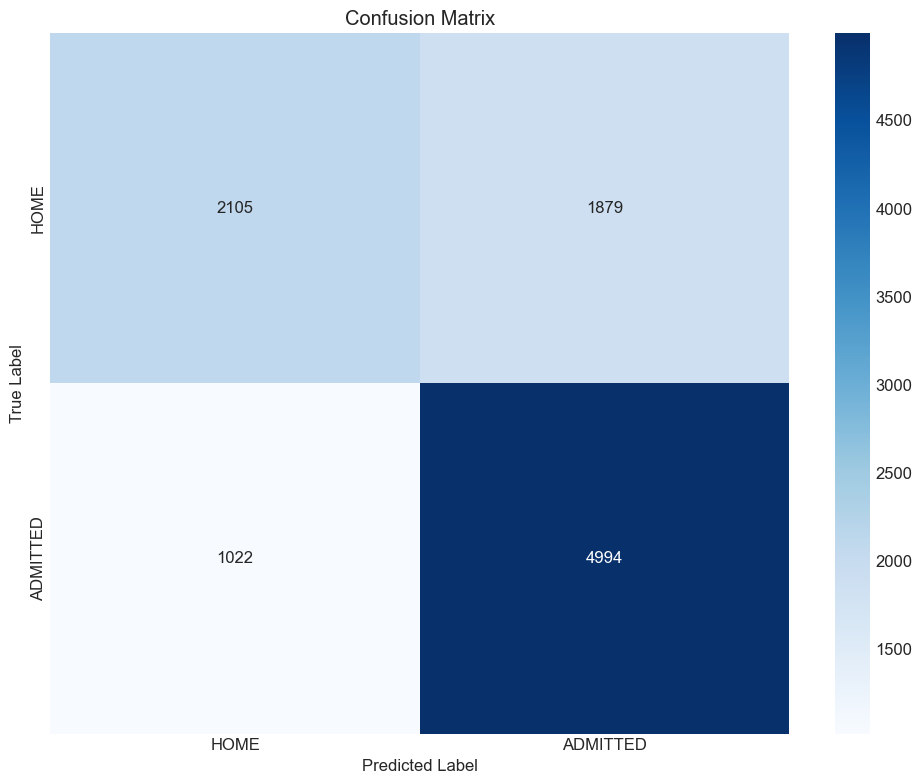

In [5]:
# First, process the data and get predictions
test_results = model.test(df=validation_df)

# Plot confusion matrix with proper labels - use actual counts not normalized
model.plot_confusion_matrix(
    y_true=test_results['y_true'],
    y_pred=test_results['y_pred'],
    normalize=False,  # Show actual counts
    title='Confusion Matrix'
)
plt.show()

## Feature Importance Analysis

Let's examine which features are most influential in the model's decisions.

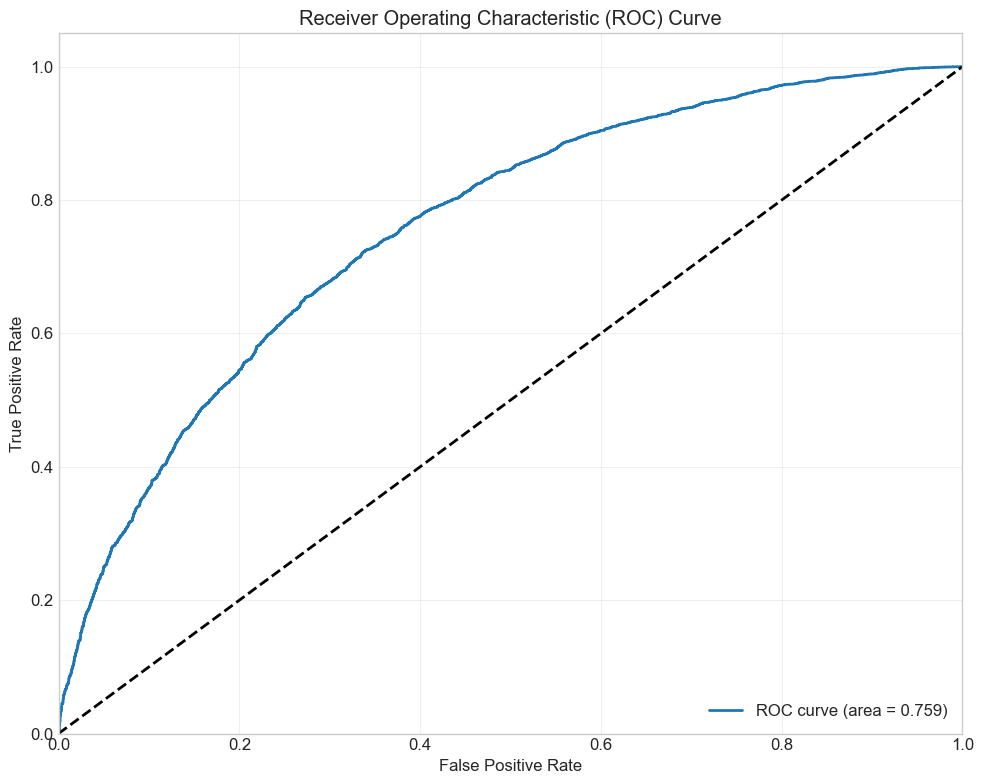

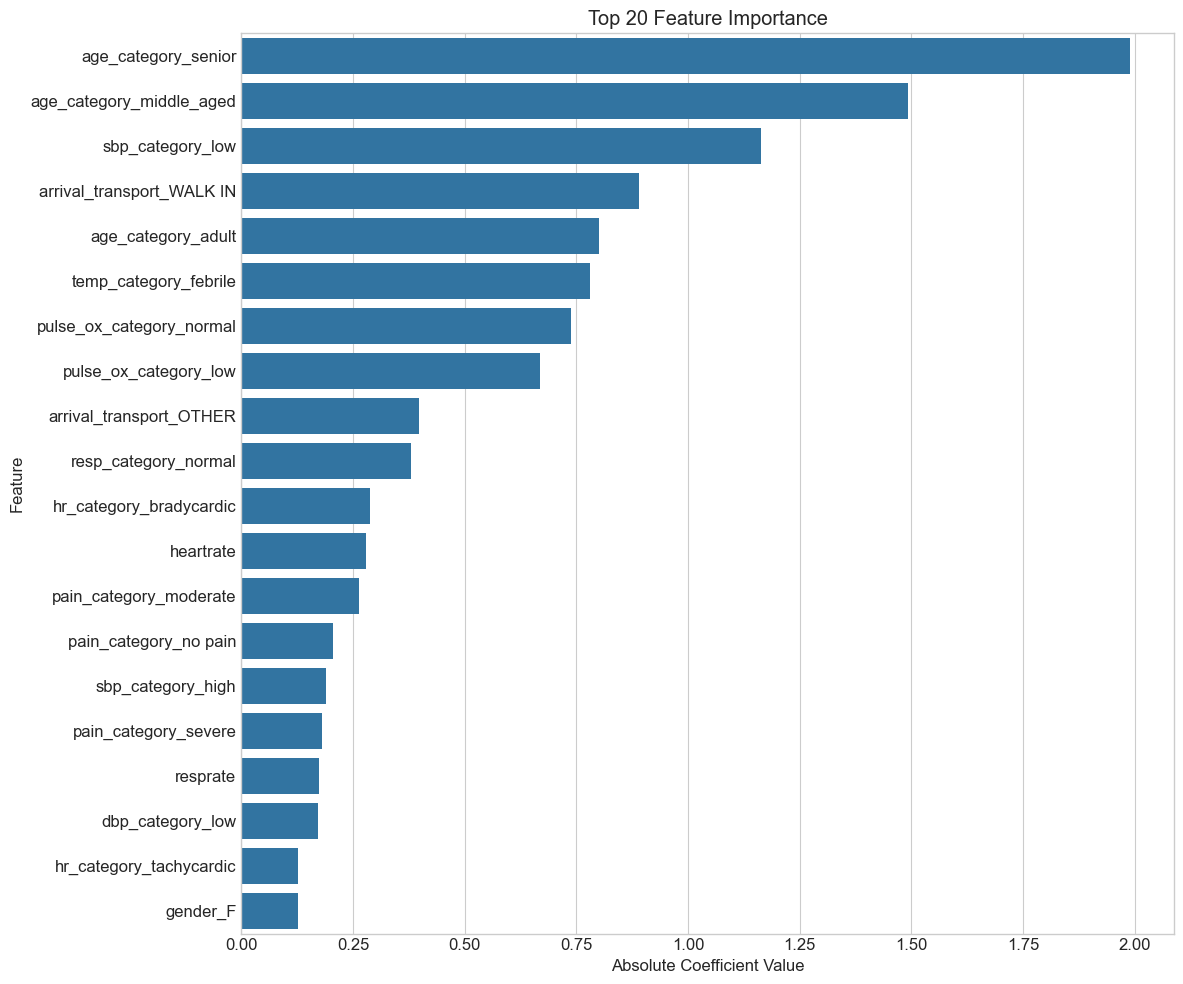


Top 10 Most Important Features:


,feature,importance,coefficient
6,age_category_senior,1.988311,-1.988311
21,age_category_middle_aged,1.492477,-1.492477
1,sbp_category_low,1.163598,-1.163598
25,arrival_transport_WALK IN,0.890168,0.890168
19,age_category_adult,0.800659,-0.800659
0,temp_category_febrile,0.780026,-0.780026
17,pulse_ox_category_normal,0.737133,0.737133
29,pulse_ox_category_low,0.668654,-0.668654
4,arrival_transport_OTHER,0.398546,0.398546
14,resp_category_normal,0.380106,0.380106


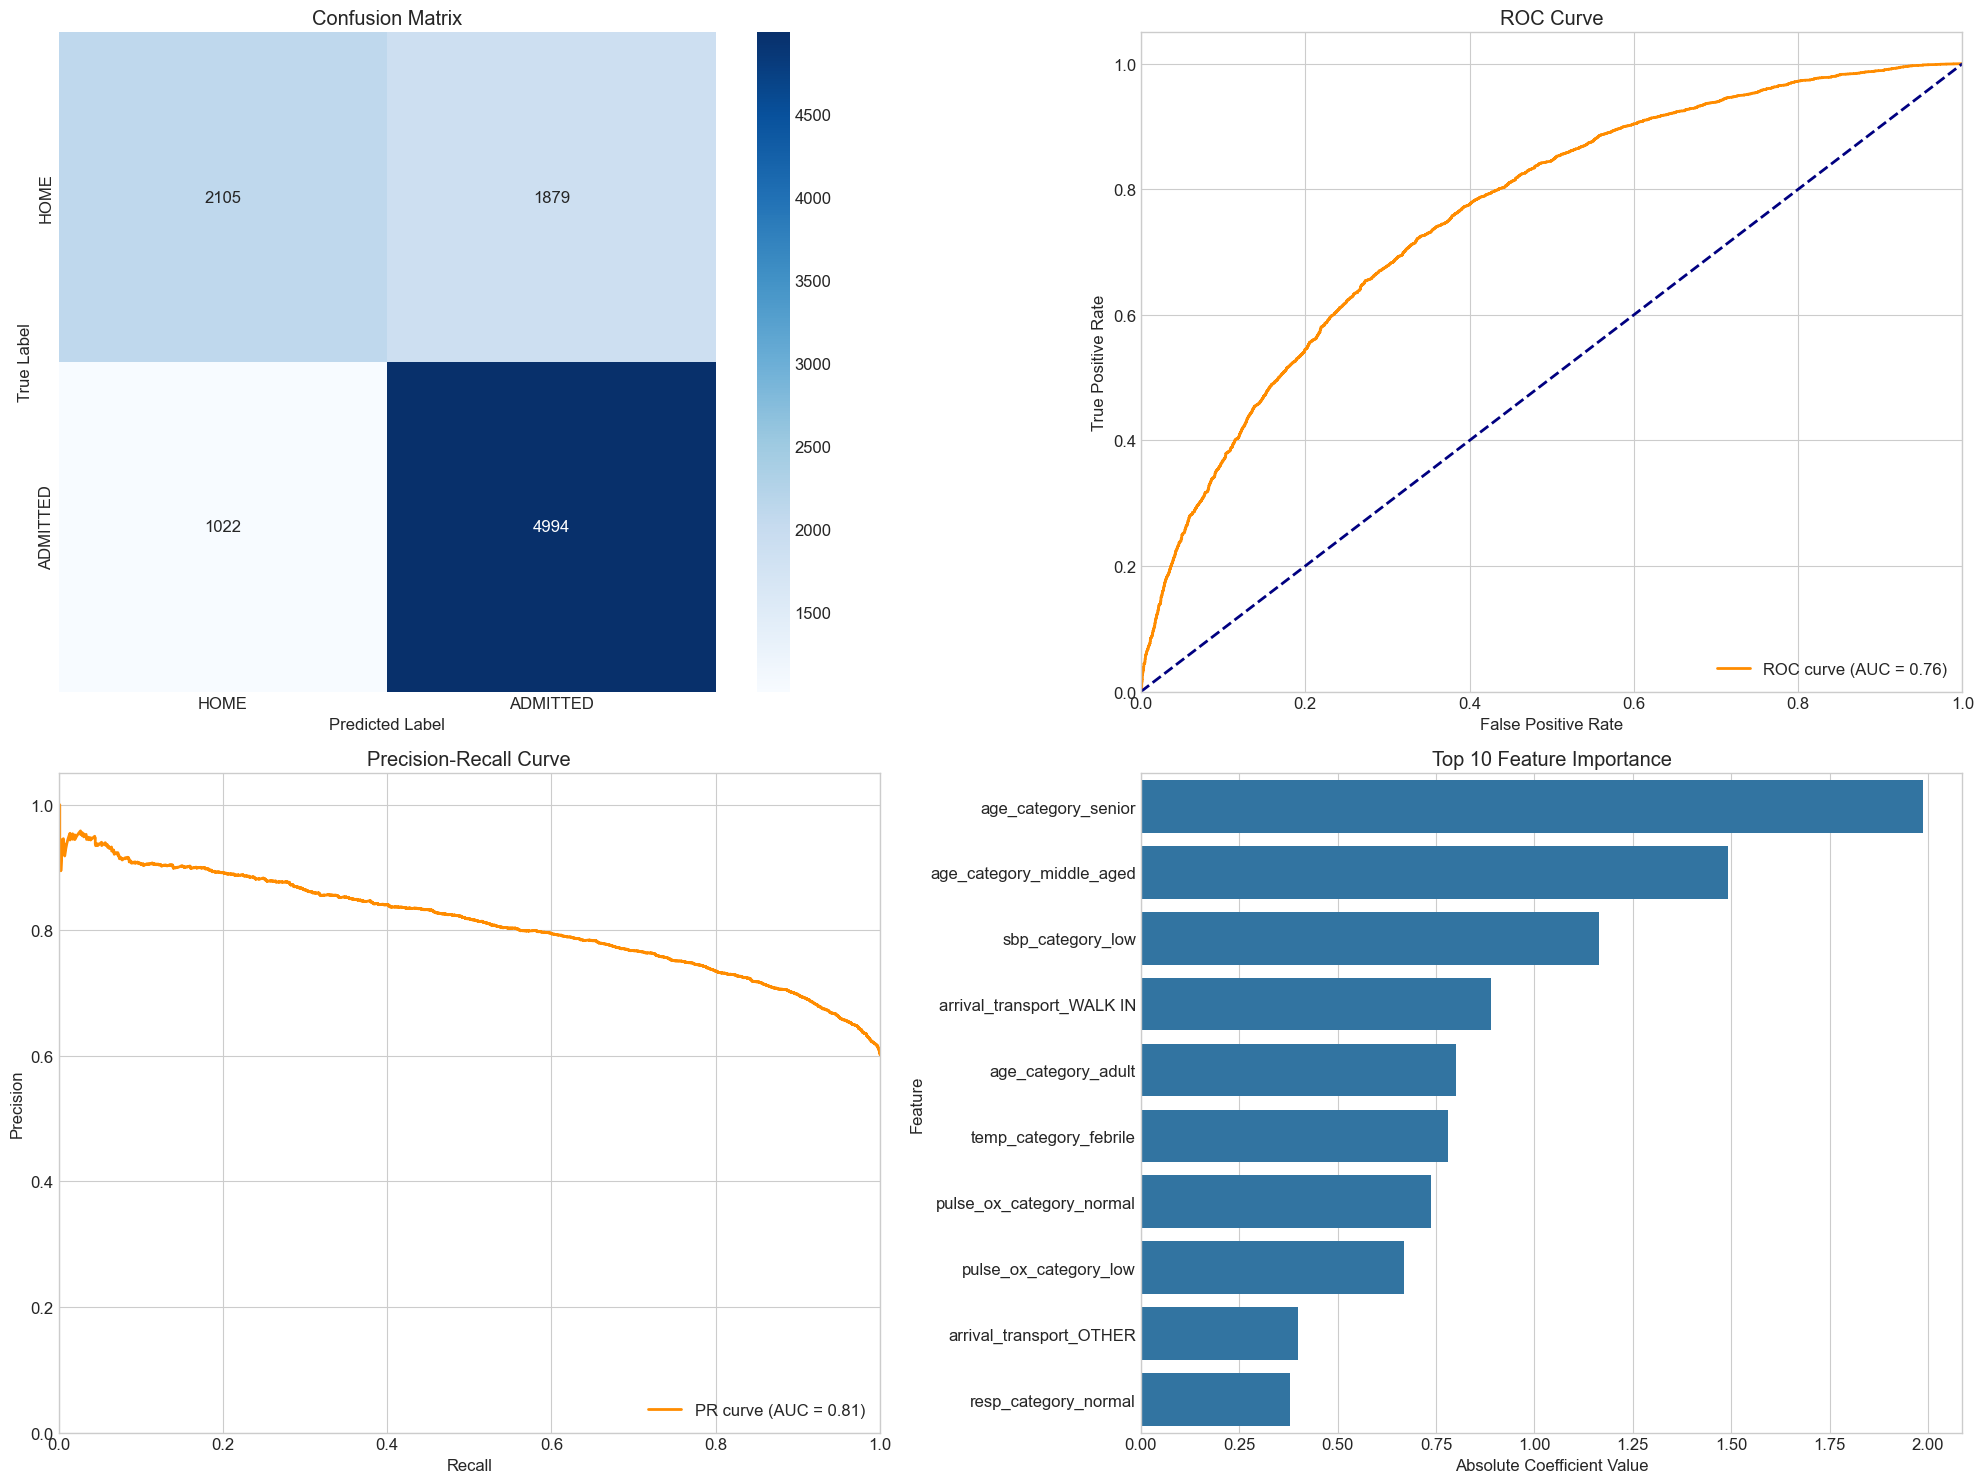

In [6]:
#  Plot ROC curve
model.plot_roc_curve(
    y_true=test_results['y_true'],
    y_score=test_results['probabilities']
)
plt.show()

# Plot feature importance using the test data's feature names
model.plot_feature_importance(
    top_n=20,
    X=test_results['X']  # Pass the processed features to get correct feature names
)
plt.show()

# Get detailed feature importance data
feature_importance = model.get_feature_importance(X=test_results['X'])
print("\nTop 10 Most Important Features:")
display(feature_importance.head(10))

# Create a comprehensive visualization dashboard
model.visualize(
    y_true=test_results['y_true'],
    y_pred=test_results['y_pred'],
    y_score=test_results['probabilities'],
    X=test_results['X']  # Pass X here as well
)
plt.show()

## Error Analysis

Let's examine patterns in misclassified cases.

In [7]:
def analyze_errors(df, y_true, y_pred, y_prob):
    """Analyze misclassified cases"""
    
    #Create DataFrame with predictions
    analysis_df = df.copy()
    analysis_df['true_label'] = y_true
    analysis_df['predicted_label'] = y_pred
    analysis_df['prediction_probability'] = y_prob
    analysis_df['is_error'] = y_true != y_pred
    
    # Separate false positives and negatives
    false_positives = analysis_df[(analysis_df['true_label'] == 0) & (analysis_df['predicted_label'] == 1)]
    false_negatives = analysis_df[(analysis_df['true_label'] == 1) & (analysis_df['predicted_label'] == 0)]
    
    # Analyze characteristics of errors
    print("\nError Analysis Summary:")
    print(f"Total errors: {len(false_positives) + len(false_negatives)}")
    print(f"False positives: {len(false_positives)}")
    print(f"False negatives: {len(false_negatives)}")
    
    # Analyze high confidence errors
    high_conf_errors = analysis_df[
        (analysis_df['is_error']) & 
        (analysis_df['prediction_probability'] > 0.8)
    ]
    
    print(f"\nHigh confidence errors (prob > 0.8): {len(high_conf_errors)}")
    
    return {
        'false_positives': false_positives,
        'false_negatives': false_negatives,
        'high_confidence_errors': high_conf_errors
    }

error_analysis = analyze_errors(
    validation_df,
    test_results['y_true'],
    test_results['y_pred'], 
    test_results['probabilities']
)

# Display sample of high confidence errors
print("\nSample of High Confidence Errors:")
display(error_analysis['high_confidence_errors'].head())


Error Analysis Summary:
Total errors: 2901
False positives: 1879
False negatives: 1022

High confidence errors (prob > 0.8): 327

Sample of High Confidence Errors:


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,...,cc_word_count,cc_entropy,cc_lexical_complexity,cc_pos_complexity,cc_med_entity_count,predicted_disposition,true_label,predicted_label,prediction_probability,is_error
8,10905644,37146475,98.0,62.0,20.0,97.0,158.0,66.0,6.0,3.0,...,2,1.0,1.0,2.0,0.0,0.807137,0,1,0.807137,True
148,11727479,33585364,98.3,68.0,18.0,100.0,130.0,78.0,8.0,3.0,...,1,-0.0,1.0,0.0,0.0,0.803848,0,1,0.803848,True
167,14676772,31825867,97.7,99.0,18.0,97.0,146.0,94.0,9.0,3.0,...,2,1.0,1.0,1.0,1.0,0.890957,0,1,0.890957,True
169,12953697,38521806,97.3,80.0,18.0,97.0,133.0,77.0,4.4,2.0,...,1,-0.0,1.0,0.0,1.0,0.847983,0,1,0.847983,True
187,11277461,31240867,97.8,67.0,22.0,100.0,130.0,68.0,8.0,3.0,...,1,-0.0,1.0,1.0,0.0,0.831473,0,1,0.831473,True


## Case Studies

Let's examine specific examples of interesting misclassifications.

In [8]:
test_results.keys()

dict_keys(['predictions', 'y_pred', 'probabilities', 'metrics', 'markdown', 'X', 'y_true', 'feature_names', 'df'])

In [9]:
# Run error analysis
error_analysis = model.analyze_errors(
    validation_df, 
    test_results['y_true'], 
    test_results['y_pred'], 
    test_results['probabilities']
)

# Analyze specific cases with all data fields available
print("\nHigh Confidence False Positives:")
display(error_analysis['high_confidence_errors'])



Error Analysis Summary:
Total cases analyzed: 10000
Total errors: 2901 (29.0%)
False positives: 1879 (47.2% of negative cases)
False negatives: 1022 (17.0% of positive cases)
High confidence errors (prob > 0.8): 327

High Confidence False Positives:


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,...,cc_word_count,cc_entropy,cc_lexical_complexity,cc_pos_complexity,cc_med_entity_count,predicted_disposition,y_true,y_pred,prediction_probability,is_error
4825,14801579,38375966,98.0,66.0,18.0,99.0,170.0,111.0,8.0,3.0,...,2,1.000000,1.000000,1.0,1.0,0.934305,0,1,0.934305,True
5536,17529132,31042646,97.3,60.0,18.0,96.0,170.0,100.0,2.0,2.0,...,4,2.000000,1.000000,3.0,0.0,0.930997,0,1,0.930997,True
6568,17082184,36508455,97.7,96.0,16.0,100.0,144.0,85.0,5.0,3.0,...,6,1.918296,0.666667,1.0,1.0,0.925210,0,1,0.925210,True
1873,13734408,35064656,99.2,53.0,16.0,100.0,140.0,83.0,2.0,3.0,...,1,-0.000000,1.000000,0.0,1.0,0.922525,0,1,0.922525,True
8675,13742406,30157254,98.1,65.0,17.0,100.0,111.0,90.0,9.0,4.0,...,1,-0.000000,1.000000,0.0,0.0,0.916296,0,1,0.916296,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,16616225,34103354,99.0,105.0,17.0,100.0,108.0,62.0,0.0,3.0,...,2,1.000000,1.000000,0.0,0.0,0.802214,0,1,0.802214,True
3381,10900387,37636706,99.2,83.0,18.0,100.0,203.0,100.0,10.0,3.0,...,2,1.000000,1.000000,0.0,1.0,0.801909,0,1,0.801909,True
9920,16441183,34518629,98.6,63.0,16.0,97.0,121.0,74.0,7.0,2.0,...,2,1.000000,1.000000,0.0,0.0,0.801812,0,1,0.801812,True
9409,10364049,31057071,97.9,81.0,16.0,100.0,119.0,80.0,10.0,2.0,...,2,1.000000,1.000000,2.0,0.0,0.801413,0,1,0.801413,True


In [11]:

# Run error analysis with both original and processed features
error_analysis = model.analyze_errors(
    df=test_results['df'],  # Use the original DataFrame from test_results
    y_true=test_results['y_true'],
    y_pred=test_results['y_pred'],
    y_prob=test_results['probabilities'],
    processed_features=test_results['X']  # Processed features used by model
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("\nHigh Confidence False Positives (Predicted ADMITTED but actually went HOME):")
for _, case in error_analysis['false_positives'].head(3).iterrows():
    print("\nCase:")
    print(case)
    print("\n" + "="*80 + "\n")
    

print("\nHigh Confidence False Negatives (Predicted HOME but actually ADMITTED):")
for _, case in error_analysis['false_negatives'].head(3).iterrows():
    print("\nCase:")
    print(case)
    print("\n" + "="*80 + "\n")
    
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')


Error Analysis Summary:
Total cases analyzed: 10000
Total errors: 2901 (29.0%)
False positives: 1879 (47.2% of negative cases)
False negatives: 1022 (17.0% of positive cases)
High confidence errors (prob > 0.8): 327

High Confidence False Positives (Predicted ADMITTED but actually went HOME):

Case:
subject_id                                             14801579
stay_id                                                38375966
temperature                                                98.0
heartrate                                                  66.0
resprate                                                   18.0
o2sat                                                      99.0
sbp                                                       170.0
dbp                                                       111.0
pain                                                        8.0
acuity                                                      3.0
chiefcomplaint                                         Abd


## Validation Data Distribution



- Total cases: 10000
- ADMITTED: 3984 (39.8%)
- HOME: 6016 (60.2%)


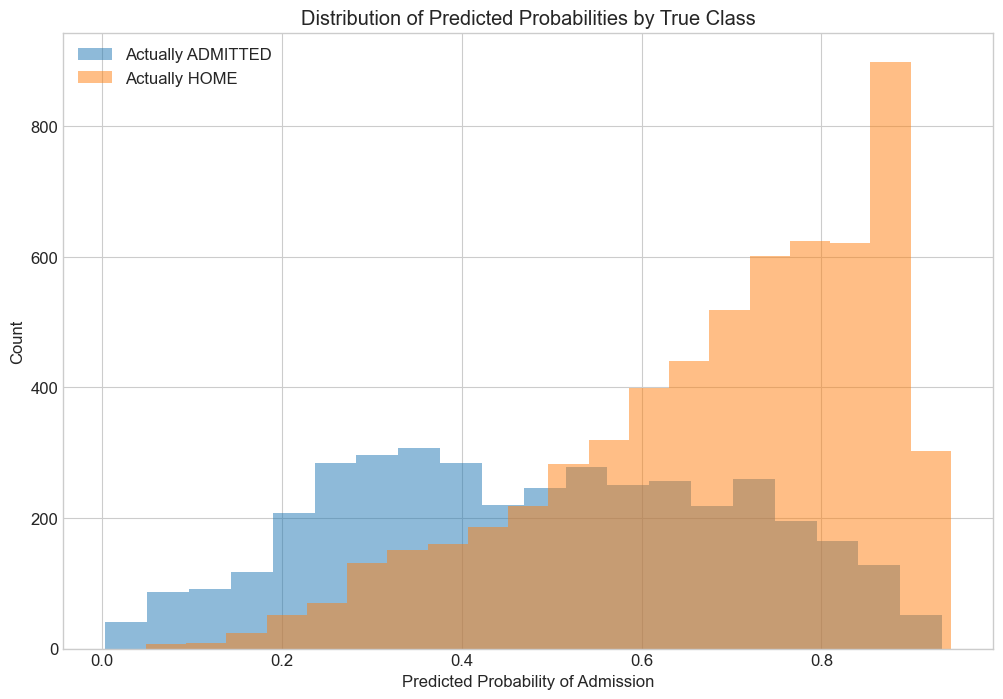


## False Positive Analysis (Top 3)



### Case Analysis (False Positive)

**Prediction Details:**
- True Class: HOME
- Predicted Class: ADMITTED
- Predicted probability: 0.944

**Patient Information:**
- Chief Complaint: SI
- Age: 20.0

**Vital Signs:**
- Temperature: 98.8
- Heart Rate: 82.0
- Resp Rate: 12.0
- O2 Sat: 100.0
- BP: 147.0/94.0
- Pain: 2.0
- SIRS: 0
- Acuity: 2.0
- Shock Index: 0.56


Final feature count: 34 (matching training features)



### Top 5 influential features for this case:


- age_category_senior: 1.988

- age_category_middle_aged: 1.492

- sbp_category_low: 1.164

- arrival_transport_WALK IN: 0.890

- age_category_adult: 0.801


### Case Analysis (False Positive)

**Prediction Details:**
- True Class: HOME
- Predicted Class: ADMITTED
- Predicted probability: 0.944

**Patient Information:**
- Chief Complaint: L Knee pain, L Wrist pain, s/p Fall
- Age: 33.0

**Vital Signs:**
- Temperature: 97.0
- Heart Rate: 69.0
- Resp Rate: 16.0
- O2 Sat: 99.0
- BP: 118.0/90.0
- Pain: 3.0
- SIRS: 0
- Acuity: 3.0
- Shock Index: 0.58


Final feature count: 34 (matching training features)



### Top 5 influential features for this case:


- age_category_senior: 1.988

- age_category_middle_aged: 1.492

- sbp_category_low: 1.164

- arrival_transport_WALK IN: 0.890

- age_category_adult: 0.801


### Case Analysis (False Positive)

**Prediction Details:**
- True Class: HOME
- Predicted Class: ADMITTED
- Predicted probability: 0.939

**Patient Information:**
- Chief Complaint: N/V
- Age: 21.0

**Vital Signs:**
- Temperature: 96.0
- Heart Rate: 72.0
- Resp Rate: 16.0
- O2 Sat: 100.0
- BP: 153.0/98.0
- Pain: 9.0
- SIRS: 0
- Acuity: 3.0
- Shock Index: 0.47


Final feature count: 34 (matching training features)



### Top 5 influential features for this case:


- age_category_senior: 1.988

- age_category_middle_aged: 1.492

- sbp_category_low: 1.164

- arrival_transport_WALK IN: 0.890

- age_category_adult: 0.801


## False Negative Analysis (Top 3)



### Case Analysis (False Negative)

**Prediction Details:**
- True Class: ADMITTED
- Predicted Class: HOME
- Predicted probability: 0.004

**Patient Information:**
- Chief Complaint: SHORTNESS OF BREATH
- Age: 79.0

**Vital Signs:**
- Temperature: 99.5
- Heart Rate: 131.0
- Resp Rate: 56.0
- O2 Sat: 90.0
- BP: 130.0/64.0
- Pain: 10.0
- SIRS: 1
- Acuity: 1.0
- Shock Index: 1.01


Final feature count: 34 (matching training features)



### Top 5 influential features for this case:


- age_category_senior: 1.988

- age_category_middle_aged: 1.492

- sbp_category_low: 1.164

- arrival_transport_WALK IN: 0.890

- age_category_adult: 0.801


### Case Analysis (False Negative)

**Prediction Details:**
- True Class: ADMITTED
- Predicted Class: HOME
- Predicted probability: 0.005

**Patient Information:**
- Chief Complaint: FEVER
- Age: 75.0

**Vital Signs:**
- Temperature: 100.8
- Heart Rate: 110.0
- Resp Rate: 40.0
- O2 Sat: 90.0
- BP: 124.0/72.0
- Pain: 4.4
- SIRS: 1
- Acuity: 1.0
- Shock Index: 0.89


Final feature count: 34 (matching training features)



### Top 5 influential features for this case:


- age_category_senior: 1.988

- age_category_middle_aged: 1.492

- sbp_category_low: 1.164

- arrival_transport_WALK IN: 0.890

- age_category_adult: 0.801


### Case Analysis (False Negative)

**Prediction Details:**
- True Class: ADMITTED
- Predicted Class: HOME
- Predicted probability: 0.009

**Patient Information:**
- Chief Complaint: Fever
- Age: 59.0

**Vital Signs:**
- Temperature: 103.3
- Heart Rate: 153.0
- Resp Rate: 28.0
- O2 Sat: 86.0
- BP: 144.0/107.0
- Pain: 4.4
- SIRS: 1
- Acuity: 2.0
- Shock Index: 1.06


Final feature count: 34 (matching training features)



### Top 5 influential features for this case:


- age_category_senior: 1.988

- age_category_middle_aged: 1.492

- sbp_category_low: 1.164

- arrival_transport_WALK IN: 0.890

- age_category_adult: 0.801

In [12]:
def analyze_case(row, case_type):
    """Analyze a single failure case with IPython display formatting."""
    display(Markdown(f"""
### Case Analysis ({case_type})

**Prediction Details:**
- True Class: {row['disposition']}
- Predicted Class: {'ADMITTED' if row['predicted_disposition'] > 0.5 else 'HOME'}
- Predicted probability: {row['predicted_disposition']:.3f}

**Patient Information:**
- Chief Complaint: {row['chiefcomplaint']}
- Age: {row['anchor_age']}

**Vital Signs:**
- Temperature: {row['temperature']:.1f}
- Heart Rate: {row['heartrate']}
- Resp Rate: {row['resprate']}
- O2 Sat: {row['o2sat']:.1f}
- BP: {row['sbp']}/{row['dbp']}
- Pain: {row['pain']}
- SIRS: {row['sirs']}
- Acuity: {row['acuity']}
- Shock Index: {row['shock_index']:.2f}
"""))
    
    # Process the current case's features to match model format
    single_case_df = pd.DataFrame([row])
    processed = model._process_features(single_case_df)
    X_case = processed['X']
    
    # Get feature importance for all features
    feature_importance = model.get_feature_importance(X_case)
    top_features = feature_importance.nlargest(5, 'importance')
    
    display(Markdown("""
### Top 5 influential features for this case:
"""))
    
    for _, row in top_features.iterrows():
        display(Markdown(f"- {row['feature']}: {row['importance']:.3f}"))

# Analyze misclassified cases
misclassified = validation_df[
    (validation_df['disposition'] == 'ADMITTED') != (validation_df['predicted_disposition'] > 0.5)
].copy()

# Display validation data distribution
display(Markdown("""
## Validation Data Distribution
"""))
total_cases = len(validation_df)
admitted = (validation_df['disposition'] == 'ADMITTED').sum()
home = (validation_df['disposition'] == 'HOME').sum()

display(Markdown(f"""
- Total cases: {total_cases}
- ADMITTED: {admitted} ({100 * admitted/total_cases:.1f}%)
- HOME: {home} ({100 * home/total_cases:.1f}%)
"""))

# Plot probability distribution
plt.figure(figsize=(12, 8))
admitted_mask = validation_df['disposition'] == 'ADMITTED'
plt.hist(validation_df[admitted_mask]['predicted_disposition'], 
         alpha=0.5, bins=20, label='Actually ADMITTED')
plt.hist(validation_df[~admitted_mask]['predicted_disposition'], 
         alpha=0.5, bins=20, label='Actually HOME')
plt.xlabel('Predicted Probability of Admission')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities by True Class')
plt.legend()
plt.show()

# Analyze False Positives
display(Markdown("""
## False Positive Analysis (Top 3)
"""))
false_positives = misclassified[
    (misclassified['predicted_disposition'] > 0.5) & 
    (misclassified['disposition'] == 'HOME')
].sort_values('predicted_disposition', ascending=False)

for _, case in false_positives.head(3).iterrows():
    analyze_case(case, "False Positive")

# Analyze False Negatives
display(Markdown("""
## False Negative Analysis (Top 3)
"""))
false_negatives = misclassified[
    (misclassified['predicted_disposition'] <= 0.5) & 
    (misclassified['disposition'] == 'ADMITTED')
].sort_values('predicted_disposition')

for _, case in false_negatives.head(3).iterrows():
    analyze_case(case, "False Negative")